In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Combined Cycle Power Plant Data Set

## 1.(a) Download the data

In [2]:
dat = pd.read_excel("../data/CCPP/Folds5x2_pp.xlsx")

## 1.(b) Exploring the Data

### 1.(b)i

In [3]:
dat

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


There are 9568 rows and 5 columns in the dataset.  For the columns, the four features are  hourly average ambient variables Temperature (AT), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V). The column of PE is the net hourly electrical energy output of the plant, which is the value we want to predict. Each row represent a sample point.

### # 1.(b)ii Make scatterplots


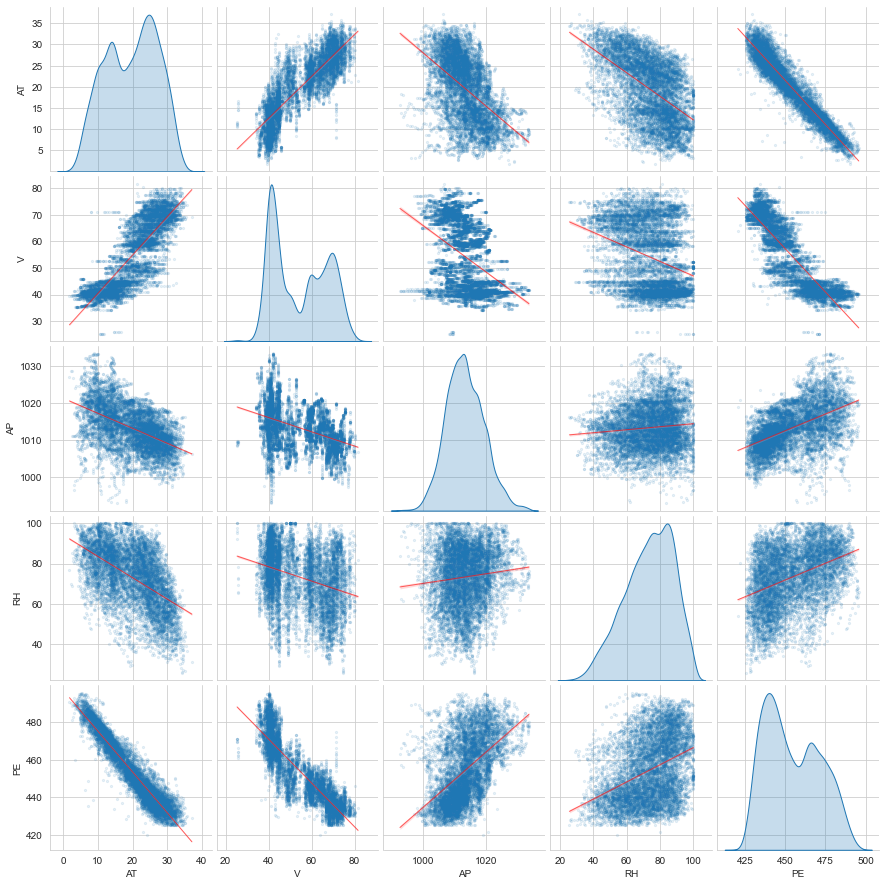

In [4]:
sns.set_style("whitegrid")
pair_plot = sns.pairplot(dat, diag_kind="kde", kind="reg", palette=sns.color_palette("Paired"),plot_kws={'line_kws':{'color': 'red', "linewidth": 1, 'alpha': 0.6}, 
                                   'scatter_kws': {'s': 5, 'alpha': 0.1}}) 

plt.show()

According to the plot, we can see that AT and V has a positive correlation and the slope is large so their correlation may be strong. 
AP,RH have negative correlation with AT and V.


AT and V have negative correlation with PE. RH and AP have positive correlation with PE.

### 1(b)iii Statistical Info Summary

In [5]:

feature = [col for col in dat.columns]
mean = [dat[col].mean() for col in dat.columns]
median = [dat[col].median() for col in dat.columns]
range_dat = [dat[col].max() - dat[col].min() for col in dat.columns]
first_quantile = [dat[col].quantile(0.25) for col in dat.columns]
third_quantile = [dat[col].quantile(0.75) for col in dat.columns]
IQR = [y - x for x, y in zip(first_quantile, third_quantile)]

summary = {
    "feature" : feature,
    "mean" : mean,
    "median" : median,
    "range" : range_dat,
    "first quartile" : first_quantile,
    "third quartile" : third_quantile,
    "interquartile range" : IQR }

pd.DataFrame(summary)


,feature,mean,median,range,first quartile,third quartile,interquartile range
0,AT,19.651231,20.345,35.30,13.5100,25.72,12.2100
1,V,54.305804,52.080,56.20,41.7400,66.54,24.8000
2,AP,1013.259078,1012.940,40.41,1009.1000,1017.26,8.1600
3,RH,73.308978,74.975,74.60,63.3275,84.83,21.5025
4,PE,454.365009,451.550,75.50,439.7500,468.43,28.6800


### 1.(c) For each predictor, fit a simple linear regression model to predict the response.

In [6]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import OLSInfluence

#create a dictionary to store coefficients
regression_coefs = {}



C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        23:12:59   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    497.0341      0.156   3177.280      0.0

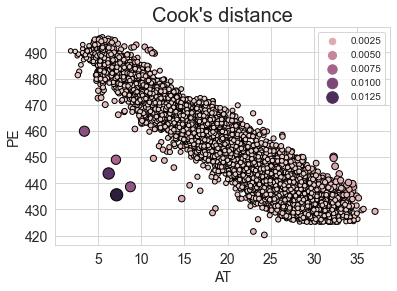

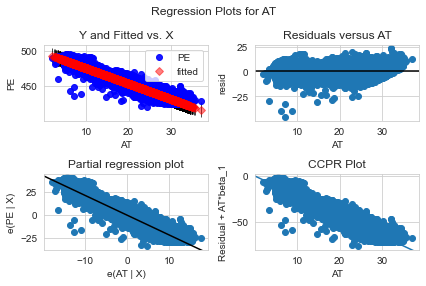

In [7]:
f = 'PE ~ AT'
model = ols('PE ~ AT', data=dat).fit()

# calculate the cooks_distance - the OLSInfluence object contains multiple influence measurements
cook_distance = OLSInfluence(model).cooks_distance
(distance, p_value) = cook_distance

# scatter plot - x axis (independent variable height), y-axis (dependent variable weight), size and color of the marks according to its cook's distance
sns.scatterplot(dat.AT, dat.PE, hue=distance, size=distance, sizes=(20, 150), edgecolor='black', linewidth=1)

# ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# labels and title
plt.xlabel('AT', fontsize=14)
plt.ylabel('PE', fontsize=14)
plt.title('Cook\'s distance', fontsize=20)


regression_coefs['AT'] = model.params[1]
print(model.summary())


fig = sm.graphics.plot_regress_exog(model, "AT")
fig.tight_layout(pad=1.0)

> The p-value is extremely small so we can definitely reject the null hypothesis so this predictor is important. And according to the plot, the points are closely around the line. Also the slope is relative large so we can assert this predictor is significant.

> Here we use cook's distance to find outliers and there are several data points with cook's distance larger than 0.01 but the distance is still very small thus I don't think we have to remove these points. With such small cook's distance, these points does not necessarily hurt the model. On the contrary, with these points our model may perform better on the test set.  

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        23:13:01   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    517.8015      0.378   1370.218      0.0

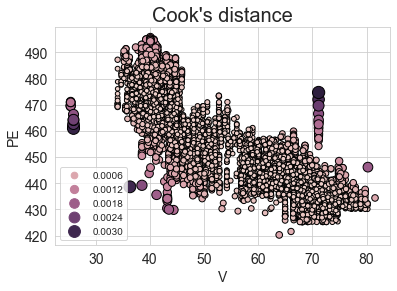

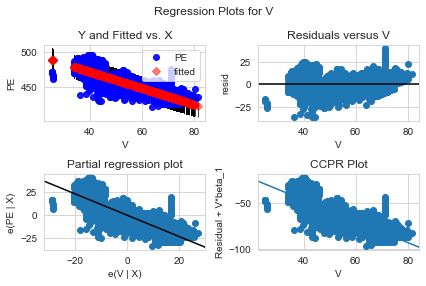

In [8]:
f = 'PE ~ V'
model = ols(formula=f, data=dat).fit()

# calculate the cooks_distance - the OLSInfluence object contains multiple influence measurements
cook_distance = OLSInfluence(model).cooks_distance
(distance, p_value) = cook_distance

# scatter plot - x axis (independent variable height), y-axis (dependent variable weight), size and color of the marks according to its cook's distance
sns.scatterplot(dat.V, dat.PE, hue=distance, size=distance, sizes=(20, 150), edgecolor='black', linewidth=1)

# ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# labels and title
plt.xlabel('V', fontsize=14)
plt.ylabel('PE', fontsize=14)    
plt.title('Cook\'s distance', fontsize=20)
regression_coefs['V'] = model.params[1]

print(model.summary())

fig = sm.graphics.plot_regress_exog(model, "V")
fig.tight_layout(pad=1.0)

> This plot also shows the line is surrounded with many points and the p-value is extremely small so we consider this predictor as a important one.

> The largest cook's distance is 0.003, still too small to take it as a outlier.

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        23:13:02   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1055.2610     25.459    -41.449      0.0

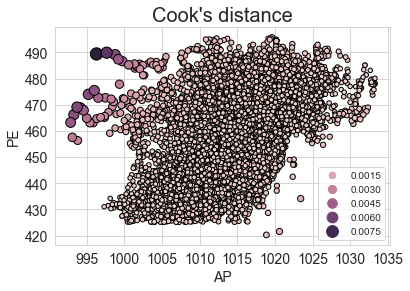

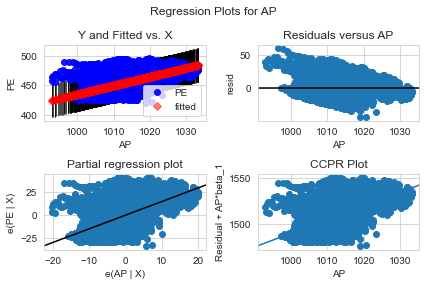

In [9]:
f = 'PE ~ AP'
model = ols(formula=f, data=dat).fit()

# calculate the cooks_distance - the OLSInfluence object contains multiple influence measurements
cook_distance = OLSInfluence(model).cooks_distance
(distance, p_value) = cook_distance

# scatter plot - x axis (independent variable height), y-axis (dependent variable weight), size and color of the marks according to its cook's distance
sns.scatterplot(dat.AP, dat.PE, hue=distance, size=distance, sizes=(20, 150), edgecolor='black', linewidth=1)

# ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# labels and title
plt.xlabel('AP', fontsize=14)
plt.ylabel('PE', fontsize=14)    
plt.title('Cook\'s distance', fontsize=20)

regression_coefs['AP'] = model.params[1]
print(model.summary())

fig = sm.graphics.plot_regress_exog(model, "AP")
fig.tight_layout(pad=1.0)

> This plot also shows the line is surrounded with many points and the p-value extremely small so we consider this predictor as a important one.

> Cook's distance too small to take it as outlier.

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        23:13:04   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    420.9618      0.823    511.676      0.0

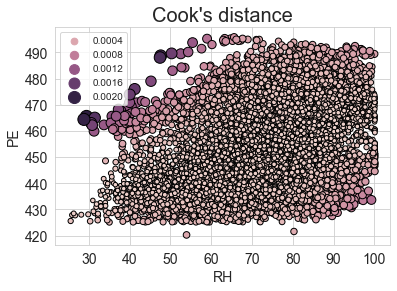

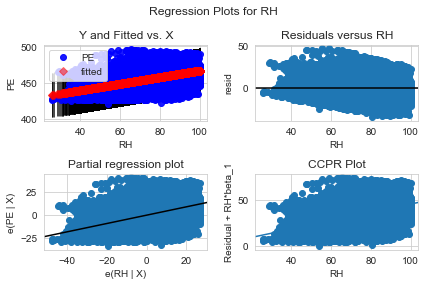

In [10]:
f = 'PE ~ RH'
model = ols(formula=f, data=dat).fit()

# calculate the cooks_distance - the OLSInfluence object contains multiple influence measurements
cook_distance = OLSInfluence(model).cooks_distance
(distance, p_value) = cook_distance

# scatter plot - x axis (independent variable height), y-axis (dependent variable weight), size and color of the marks according to its cook's distance
sns.scatterplot(dat.RH, dat.PE, hue=distance, size=distance, sizes=(20, 150), edgecolor='black', linewidth=1)

# ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# labels and title
plt.xlabel('RH', fontsize=14)
plt.ylabel('PE', fontsize=14)    
plt.title('Cook\'s distance', fontsize=20)

regression_coefs['RH'] = model.params[1]
print(model.summary())

fig = sm.graphics.plot_regress_exog(model, "RH")
fig.tight_layout(pad=1.0)

> This plot shows that many points are not around the line, however this predictor can be important since its relationship with PE may be non-linear. This single line is too simple to fit the data very well. And the p-value is extremely small so we consider this predictor as a important one.

> Same with previous answers, no outliers.

## 1.(d) Fit all predictors

In [11]:

f = "PE ~ AT + V + AP + RH"
model = ols(formula=f, data=dat).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        23:13:06   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    454.6093      9.749     46.634      0.0

Since all predictors' p values are extremely small, so we can reject all the null hypothesis $H_{0}$ : $\beta_j = 0$.

## 1.(e) Compare coefficients

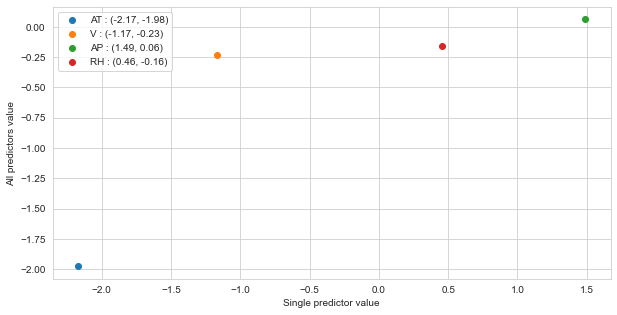

In [12]:
fig, axes = plt.subplots(figsize=(10, 5))
for i, feature in enumerate(dat.columns[:-1]):
    text = "{} : ({}, {})".format(feature, np.around(regression_coefs[feature], 2), np.around(model.params[i+1], 2))
    axes.scatter(regression_coefs[feature], model.params[i+1], label=text)
    

axes.set_xlabel("Single predictor value")
axes.set_ylabel("All predictors value")

axes.legend()
plt.show()

> According to the plot, only AT's coefficient did not change much. The other three features' coefficient all significantly changed and RH even change from positive to negative.

## 1.(f) Any nonlinear association between any predictor and the response?

In [13]:
from sklearn.preprocessing import PolynomialFeatures

#get data prepared
trainX_AT = dat['AT'].to_numpy()
trainX_V = dat['V'].to_numpy()
trainX_AP = dat['AP'].to_numpy()
trainX_RH = dat['RH'].to_numpy()
trainY_PE = dat['PE'].to_numpy()


def polyregression(trainX_feature, trainY, feature_name):
    poly = PolynomialFeatures(3)
    trainX_poly = poly.fit_transform(np.expand_dims(trainX_feature, axis=1)) 
    
    model = sm.OLS(trainY, trainX_poly)
    res = model.fit()
    
    print(res.summary())
    
    return pd.DataFrame(np.expand_dims(res.params, axis=0))

In [14]:
coefs = polyregression(trainX_AT, trainY_PE, "AT")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        23:13:07   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    732.248      0.0

**According to the summary report, the p-values are extremely small, which are small enough to reject the null hypothesis. This implies means there exists nonlinear association of predictor and respose.

In [15]:
coefs = polyregression(trainX_V, trainY_PE, "V")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        23:13:07   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        554.1468      9.151     60.557      0.0

**Here we can see $X^2$  have relatively large p-value (greater than 0.05) . This means we don't reject the Null Hypothesis of $X^2$. And $X^3$ 's p-pvalue is samller than 0.05, so we can reject the null hypothesis, which means there is nonlinear association.

**If we change the threshold of p-value to a  0.01, the $X^3$ can be treated as no association as well. 

In [16]:
coefs = polyregression(trainX_AP, trainY_PE, "AP")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        23:13:07   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0747      0.009      8.415      0.0

**The p-values are samll enough to reject the Null Hypothesis. This implies that there is nonlinear association of predictor and respose.


In [17]:
coefs = polyregression(trainX_RH, trainY_PE, "RH")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        23:13:07   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        468.4135     10.545     44.422      0.0

**The p-values are samll enough to reject the Null Hypothesis. This implies that there is nonlinear association of predictor and respose.

## 1.(g) Is there evidence of association of interactions of predictors with the response? 

In [18]:
# make interaction by ourself 
piarwise_inter = 'PE ~ AT + V + AP + RH + AT*V + AT*AP + AT*RH + V*AP + V*RH + AP*RH'
model = smf.ols(formula = piarwise_inter, data = dat).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        23:13:07   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8.721      0.0


>  It can be seen that $V$, $(AT:V)$, $(AT:RH)$ and $(V:AP)$ are statistically significant with their p-values as 0, which are  smaller than 0.05. 
>
>  If we set a p-value to 0.05, $AP$, $RH$ and $(AP:RH)$ can be considered as statistically significant as well. 
>
>  If we set a p-value to 0.10, $AT$ and $(V:RH)$ can be considered as statistically significant as well. 
>
>  For $AT:AP$, however, it has an extremely large p-value. This means it can never be statistically significant. 


## 1.(h) Improve your model using possible interaction terms or nonlinear asso- ciations between the predictors and response

In [19]:
from sklearn.metrics import mean_squared_error

# create a dict to record MSE for different models
mse_dict = {}

In [20]:
#randomly choose 70% data as training set
train_data_70 = dat.sample(frac = 0.7,random_state= 99)
train_index = train_data_70.index.to_list()

#get the rest 30% as test set
test_data = dat[~dat.index.isin(train_index)]
test_X_30 = test_data.iloc[:,:-1]
test_Y_30 = test_data.iloc[:,-1]

In [21]:
# model with all predictor, interaction and quadratic terms
f = 'PE ~ AT + V + AP + RH + np.power(AT,2) + np.power(V,2) + np.power(AP,2) + np.power(RH,2) + AT*V + AT*AP + AT*RH + V*AP + V*RH + AP*RH'
res = smf.ols(f, train_data_70).fit()
print(res.summary())

predict_trainy = res.predict(train_data_70.iloc[:, :-1])
predict_testy = res.predict(test_X_30)

train_mse = mean_squared_error(train_data_70.iloc[:, -1], predict_trainy)
test_mse = mean_squared_error(test_Y_30, predict_testy)

mse_dict["all_inter_LR"] = [train_mse, test_mse]

print("\nFor formula: \n {} \nwe have train MSE of {} and test MSE of {}".format(f, np.around(train_mse, 3), np.around(test_mse, 3)))

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     7304.
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        23:13:07   Log-Likelihood:                -19180.
No. Observations:                6698   AIC:                         3.839e+04
Df Residuals:                    6683   BIC:                         3.849e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -6882.5687   1423.057     

** Then we remove the terms with p-value greater than 0.05

In [22]:
# model after manually remove terms
formula = 'PE ~ V + AP + RH + np.power(AT,2) + np.power(AP,2) + np.power(RH,2) + AT*V + AT*RH + AP*RH + V*AP'
res = smf.ols(formula, train_data_70).fit()
print(res.summary())

predict_trainy = res.predict(train_data_70.iloc[:, :-1])
predict_testy = res.predict(test_X_30)

train_mse = mean_squared_error(train_data_70.iloc[:, -1], predict_trainy)
test_mse = mean_squared_error(test_Y_30, predict_testy)

mse_dict["remove_items_LR"] = [train_mse, test_mse]

print("\nFor formula: \n {} \nthe train MSE is {} and the test MSE is {}".format(formula, np.around(train_mse, 3), np.around(test_mse, 3)))

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     9297.
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        23:13:07   Log-Likelihood:                -19181.
No. Observations:                6698   AIC:                         3.839e+04
Df Residuals:                    6686   BIC:                         3.847e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -7444.9461   1251.991     



## 1.(i) KNN Regression:

### KNN with raw features 

In [23]:
from sklearn.neighbors import KNeighborsRegressor

# use raw data
train_X_70 = train_data_70.iloc[:, :-1]
train_Y_70 = train_data_70.iloc[:, -1]

k_reverse = []
train_error = []
test_error = []
min_idx = 0

for k in range(1, 101):
    # construct and fit the knn regressor
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train_X_70, train_Y_70)
    k_reverse.append(1 / k)
    # predict training set and calculate mse
    train_predict = knn.predict(train_X_70)
    train_mse = mean_squared_error(train_Y_70, train_predict)
    train_error.append(train_mse)
    # predict test set and calculate mse
    test_predict = knn.predict(test_X_30)
    test_mse = mean_squared_error(test_Y_30, test_predict)
    test_error.append(test_mse)
    # update the idx 
    if test_mse < test_error[min_idx]:
        min_idx = k - 1;

mse_dict["raw_KNN"] = [train_error[min_idx], test_error[min_idx]]
print("The best performance of KNN with raw data is:")
print("k : {} \nTrain MSE: {} \nTest MSE : {}".format(round(1 / k_reverse[min_idx]), 
                                                      train_error[min_idx], 
                                                      test_error[min_idx]))

The best performance of KNN with raw data is:
k : 6 
Train MSE: 11.308465196078433 
Test MSE : 16.120644881920253


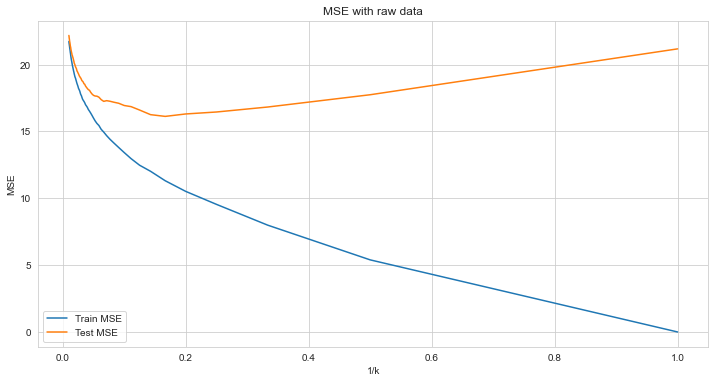

In [24]:
fig, axes = plt.subplots(figsize=(12, 6))
axes.plot(k_reverse, train_error, label="Train MSE")
axes.plot(k_reverse, test_error, label="Test MSE")
axes.set_xlabel("1/k")
axes.set_ylabel("MSE")
axes.legend()
axes.set_title("MSE with raw data")
plt.show()

### KNN with Minmax normalization method

In [25]:
# use normalized data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
norm_train_X_70 = scaler.fit_transform(train_X_70)
norm_test_X_30 = scaler.fit_transform(test_X_30)

k_reverse = []
train_error = []
test_error = []
min_idx = 0

for k in range(1, 101):
    # fit the knn regressor
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(norm_train_X_70, train_Y_70)
    k_reverse.append(1 / k)
    
    # predict train set and calculate mse
    train_predict = knn.predict(norm_train_X_70)
    train_mse = mean_squared_error(train_Y_70, train_predict)
    train_error.append(train_mse)
    
    # predict test set and calculate mse
    test_predict = knn.predict(norm_test_X_30)
    test_mse = mean_squared_error(test_Y_30, test_predict)
    test_error.append(test_mse)
    
    # update the idx 
    if test_mse < test_error[min_idx]:
        min_idx = k - 1;

mse_dict["normalized_KNN"] = [train_error[min_idx], test_error[min_idx]]
print("The best performance of KNN with normalized data is:")
print("k : {} \nTrain MSE: {} \nTest MSE : {}".format(round(1 / k_reverse[min_idx]), 
                                                      train_error[min_idx], 
                                                      test_error[min_idx]))

The best performance of KNN with normalized data is:
k : 8 
Train MSE: 11.36798338193304 
Test MSE : 17.777035594512196


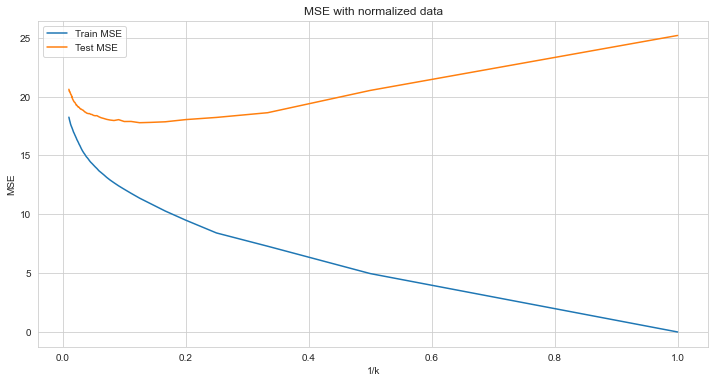

In [26]:
fig, axes = plt.subplots(figsize=(12, 6))
axes.plot(k_reverse, train_error, label="Train MSE")
axes.plot(k_reverse, test_error, label="Test MSE")
axes.set_xlabel("1/k")
axes.set_ylabel("MSE")
axes.legend()
axes.set_title("MSE with normalized data")
plt.show()

## 1.(j) Compare the results of KNN Regression with the linear regression model

In [27]:
pd.DataFrame(mse_dict, index=["train_mse", "test_mse"])

,all_inter_LR,remove_items_LR,raw_KNN,normalized_KNN
train_mse,17.979554,17.984846,11.308465,11.367983
test_mse,18.437301,18.447469,16.120645,17.777036


> According to the results, KNN performs better than linear regression (smaller MSE). Based on previous analysis, there are terms that have non-linear association with the predictor. With a relative small K, KNN fits a better non-linear boundry that generate better predictions, compared with linear mdoel.Although we add non-linear terms and interactions to the linear model, it is still worse than KNN. 

> For linear regression, removing a few insignificant terms does not change the performance. For KNN, after using the minmaxscaler that normalized our raw data, the training permance does not change much but its performance on test dataset became worse, this is unpredicted.

# 2. ISLR: 2.4.1

For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

(a) The sample size n is extremely large, and the number of predic- tors p is small.

**Ans:** In this situation, Flexible will performs better than inflexible one because a flexible model can fit better without overfitting. 


(b) The number of predictors p is extremely large, and the number of observations n is small.

**Ans:** In this situation inflexible method will be better. Flexible method will be overfitting at a higher chance.


(c) The relationship between the predictors and response is highly non-linear.

**Ans:** An inflexible will be hard to show the non-linear relationship. The flexible one will be better.


(d) The variance of the error terms, i.e. σ2 = Var(ε), is extremely high.

**Ans:**  In this case, a flexible method will be mislead by the noise and trap it into overfitting. Thus, inflexible method will be better.



# 3. ISLR: 2.4.7

The table below provides a training data set containing six observa- tions, three predictors, and one qualitative response variable.

(a) Compute the Euclidean distance between each observation and thetestpoint,X1 =X2 =X3 =0.

In [28]:
from sklearn.metrics.pairwise import euclidean_distances

#create dataset and test point 
points = [[0,3,0,'Red'],[2,0,0,'Red'],[0,1,3,'Red'], [0,1,2,'Green'], [-1,0,1,'Green'], [1,1,1,'Red']]
df = pd.DataFrame(points, index=[1,2,3,4,5,6], columns=["X1", "X2", "X3", "Y"])
trainX = df.iloc[:, :-1].to_numpy()
trainY = df.iloc[:, -1].to_numpy()
testX = np.array([[0, 0, 0]])

#calculating the distance
distance = euclidean_distances(trainX, testX)

for i, p in enumerate(distance):
    print("The Euclidean distance between point[{}] and the testpoint is {}".format(i, np.round(p[0],2)))

The Euclidean distance between point[0] and the testpoint is 3.0
The Euclidean distance between point[1] and the testpoint is 2.0
The Euclidean distance between point[2] and the testpoint is 3.16
The Euclidean distance between point[3] and the testpoint is 2.24
The Euclidean distance between point[4] and the testpoint is 1.41
The Euclidean distance between point[5] and the testpoint is 1.73


(b) What is our prediction with K = 1? Why?

**Ans:** When k =1, we choose the nearest one which is obs\[5\] Green


(c) What is our prediction with K = 3? Why?

**Ans:** When K = 3, we choose the nearest 3 data points and generate the result by majority polling. The prediction should be Red becasue 2 red vs 1 green.


(d) If the Bayes decision boundary in this problem is highly non-linear, then would we expect the best value for K to be large or small? Why?

**Ans:** A smaller value of K will be  better when decision boundary is highly non-linear. A large K would make the boundry smooth that is close to linear so a smaller k is better.